In [1]:
import fdtd

In [2]:
wavelength = 1550e-9

In [3]:
speedOfLight = 3e8#299_292_458

In [4]:
fdtd.set_backend("numpy")

In [5]:
gridLength = 25e-6

In [6]:
gridWidth = 15e-6

In [7]:
airPermitivity = 1.0006

In [8]:
siliconPermitivity = 11.68

In [9]:
siliconNitridePermitivity = 7

In [10]:
siliconDiOxidePermitivity = 3.9

In [11]:
grid = fdtd.Grid(
    shape = (gridLength, gridWidth, 2), # 25um x 15um x 1 (grid_spacing) --> 2D FDTD
)
print(grid)

Grid(shape=(161,97,2), grid_spacing=1.55e-07, courant_number=0.57)



In [12]:
#grid[60:120, 40:50, 0] = fdtd.Object(permittivity = siliconPermitivity, name="waveGuide")

In [13]:
#grid[60:120, 38:52, 1] = fdtd.Object(permittivity = siliconNitridePermitivity, name="cladding")

In [14]:
#print(grid.waveGuide)
#print(grid.cladding)

In [15]:
#grid[5:8, 13:18, 0] = fdtd.Object(permittivity=1.5**2)
#print(grid.objects)

In [16]:
#grid[8e-6, 6e-6, 0] = fdtd.PointSource(
#grid[9e-6:10e-6, 6e-6:8e-6, 0] = fdtd.LineSource(
grid[7.5e-6:8.0e-6, 11.8e-6:13.0e-6, 0] = fdtd.LineSource(
    period = wavelength / (speedOfLight), 
    name="source"
)
print(grid.source)

    LineSource(period=17, amplitude=1.0, phase_shift=0.0, name='source')
        @ x=[48, ... , 51], y=[76, ... , 83], z=[0, ... , 0]



In [17]:
grid[20e-6, :, 0] = fdtd.LineDetector(name="detector")
print(grid.detector)

    LineDetector(name='detector')
        @ x=[129, ... , 129], y=[0, ... , 96], z=[0, ... , 0]



In [18]:
# x boundaries
# grid[0, :, :] = fdtd.PeriodicBoundary(name="xbounds")
grid[0:10, :, :] = fdtd.PML(name="pml_xlow")
grid[-10:, :, :] = fdtd.PML(name="pml_xhigh")

In [19]:
# y boundaries
# grid[:, 0, :] = fdtd.PeriodicBoundary(name="ybounds")
grid[:, 0:10, :] = fdtd.PML(name="pml_ylow")
grid[:, -10:, :] = fdtd.PML(name="pml_yhigh")
print(grid)

Grid(shape=(161,97,2), grid_spacing=1.55e-07, courant_number=0.57)

sources:
    LineSource(period=17, amplitude=1.0, phase_shift=0.0, name='source')
        @ x=[48, ... , 51], y=[76, ... , 83], z=[0, ... , 0]

detectors:
    LineDetector(name='detector')
        @ x=[129, ... , 129], y=[0, ... , 96], z=[0, ... , 0]

boundaries:
    PML(name='pml_xlow')
        @ x=0:10, y=:, z=:
    PML(name='pml_xhigh')
        @ x=-10:, y=:, z=:
    PML(name='pml_ylow')
        @ x=:, y=0:10, z=:
    PML(name='pml_yhigh')
        @ x=:, y=-10:, z=:



In [20]:
grid.run(total_time=100)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 588.01it/s]


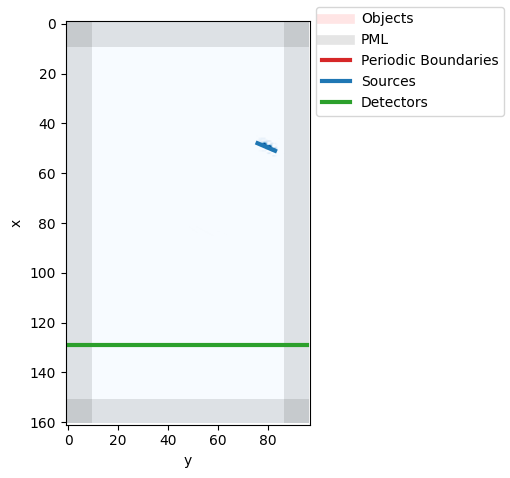

In [21]:
grid.visualize(z=0, show=False)

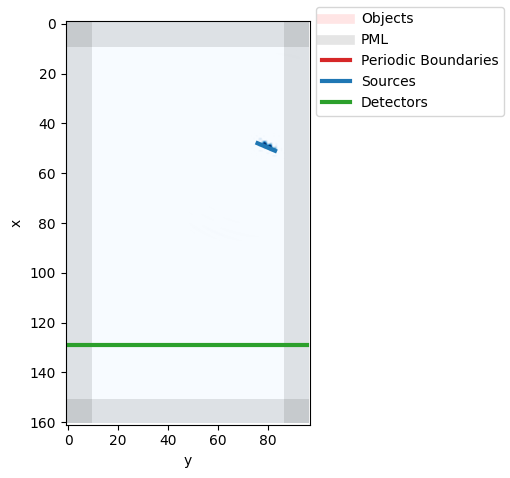

In [22]:
grid.visualize(z=1, show=False)
import matplotlib.pyplot as plt